* Authors: Andrea Jiménez Zuñiga e Isabel Afán de Ribera
* Date: 04/12/2020
* Institution: CUNEF

# 05. RANDOM FOREST

To validate our model is necessary to split the data set in a training and test set. To do this, the data is randomly divided by applying 80% of the observations to training and the remaining 20% to test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools # aplanar arrays
from sklearn import metrics  
import pickle
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

* __Reading the Data File__ 

In [2]:
data_path = '../data/Engineering_loans_final_3.csv'
loans = pd.read_csv(data_path)
loans

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,loan_status,home_ownership,purpose,grade,sub_grade,verification_status
0,-0.598017,-0.358869,-0.324389,-1.326914,1.171580,-0.024876,-1.280531,-0.348224,1.201397,1.496916,...,-0.373774,-0.165271,-0.136688,2.147209,1.0,2.0,1.0,0.0,3.0,0.0
1,-0.598017,-0.871890,-0.614953,2.544662,-0.387948,-1.181062,1.913435,-0.572315,-0.377537,-1.427104,...,-0.373774,-1.402368,-0.136688,-0.371165,1.0,3.0,2.0,4.0,22.0,1.0
2,-0.598017,-0.836712,-0.823949,-1.326914,0.520515,0.264170,-1.091911,0.316323,-0.377537,1.314164,...,-0.373774,-0.603693,-0.136688,-0.371165,1.0,1.0,2.0,0.0,3.0,0.0
3,1.672193,-0.543557,-0.782474,0.591176,-0.357984,0.264170,-1.393703,-0.474730,2.780331,0.583159,...,-0.373774,-0.944687,-0.136688,4.665582,1.0,3.0,2.0,2.0,14.0,1.0
4,-0.598017,-0.074509,0.201280,0.591176,-0.009422,0.264170,1.540387,-0.610936,-0.377537,-1.427104,...,0.716149,-0.859722,-0.136688,-0.371165,1.0,1.0,2.0,2.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462186,-0.598017,-0.358869,-0.145256,0.496045,-0.760418,1.131309,0.492498,0.088101,-0.377537,-0.513348,...,-0.373774,0.977797,-0.136688,-0.371165,1.0,3.0,1.0,3.0,15.0,2.0
462187,-0.598017,-0.309033,-0.169311,-0.300393,-0.191114,-1.470109,0.689501,0.215820,-0.377537,0.217657,...,0.716149,0.593754,-0.136688,-0.371165,0.0,1.0,1.0,1.0,9.0,2.0
462188,1.672193,-0.191771,-0.494991,0.584539,-0.615064,-0.313923,0.337410,-0.236808,1.201397,-0.513348,...,-0.373774,1.410555,-0.136688,2.147209,0.0,3.0,2.0,3.0,16.0,2.0
462189,1.672193,-0.309033,-0.487920,1.469470,-0.169917,-1.470109,-0.949398,-0.361517,-0.377537,0.948662,...,0.716149,0.990259,-0.136688,-0.371165,0.0,3.0,2.0,4.0,22.0,1.0


* __Splitting the data into train and test set__

First we define features and the target variable. Once we have defined it, we split the data.

In [3]:
X = loans.drop(['loan_status'], axis = 1).values
y = loans['loan_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

* __Fitting the model and Prediction__

In [7]:
%%time
RF_model = RandomForestClassifier(500, n_jobs = -2)
RF_model.fit(X_train, y_train)

CPU times: user 19min 33s, sys: 17.8 s, total: 19min 51s
Wall time: 7min 23s


RandomForestClassifier(n_estimators=500, n_jobs=-2)

In [8]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-2)

Next, we make the predictions using the subset above, which is the test set.

In [10]:
#Y_pred_model_RF_2 = model_RF_2.predict(X_test)

In [11]:
pred = RF_model.predict(X_test)

* __Accuracy__

In [12]:
accuracy_score(y_test,pred )

0.7575698568785902

In this case we can see that the hits were 75%.

## Model Evaluation

* __Confussion Matrix__

In order to be able to illustrate the confusion matrix, a function called plot_confusion_matrix has been defined, indicating the parameters to be taken into account.

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We proceed to graph the confussion matrix:

Confusion matrix, without normalization
[[ 4151 19285]
 [ 3125 65878]]


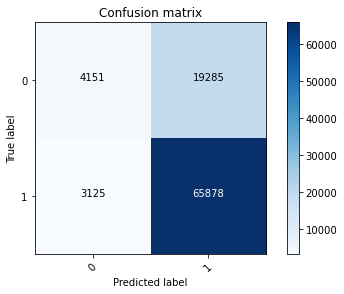

In [14]:
cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [15]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  4151
False Positives:  19285
False Negatives:  3125
True Positives:  65878


With the confusion matrix we can see that there are 65.878 true positives in total, which means that those loans that have been classified as fully paid are correctly placed.

On the other hand, we can see that there are 4.151 true negatives in total, which means that those loans that have been classified as not paid are correctly placed.

It can be seen as well, that there is a total of 19.285 and 3.125 false positives and false negatives, respectively. This means that these loans have been misplaced.

* __Normalized Confussion Matrix__

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.17712067 0.82287933]
 [0.04528789 0.95471211]]


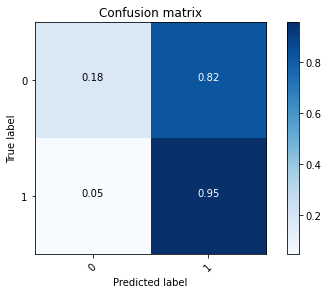

In [17]:
cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [19]:
RF_model.score(X_test, y_test)

0.7575698568785902

* __Precision, Accuracy, Recall, F1-score and Support__

In [22]:
print('Random Forest')
print(classification_report(y_test,pred))
print('Accuracy of RF classifier on test set: {:.2f}'.format(RF_model.score(X_test, y_test)))
print('')

Random Forest
              precision    recall  f1-score   support

         0.0       0.57      0.18      0.27     23436
         1.0       0.77      0.95      0.85     69003

    accuracy                           0.76     92439
   macro avg       0.67      0.57      0.56     92439
weighted avg       0.72      0.76      0.71     92439

Accuracy of RF classifier on test set: 0.76



* __ROC Curve__

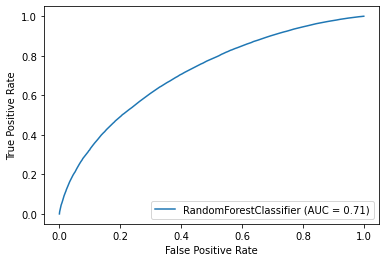

Random Forest score train:  1.0
Random Forest score:  0.7575698568785902


In [21]:
metrics.plot_roc_curve(RF_model, X_test, y_test)
plt.show()                     
print("Random Forest score train: ", RF_model.score(X_train, y_train))
print("Random Forest score: ", RF_model.score(X_test, y_test))

* **Feature Importance**

In [23]:
X_col = loans.drop(['loan_status'], axis = 1)
Y_col = loans['loan_status']

In [26]:
def plot_feature_importances(RF_model,X_train):
    
    xaxes=list(X_col.columns.values)
    yaxes=list(RF_model.feature_importances_)
    
    h=dict(zip(xaxes,yaxes))
    s = [(k, h[k]) for k in sorted(h, key=h.get, reverse=False)]
    s=dict(s)
    xaxes=list(s.keys())
    yaxes=list(s.values())
    
    n_features = X_col.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), yaxes, align='center') 
    plt.yticks(np.arange(n_features), xaxes) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

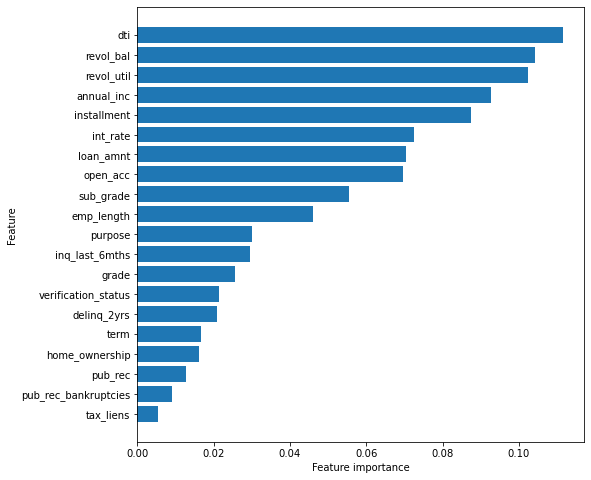

In [27]:
plot_feature_importances(RF_model,X_train)

* **Errors**

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.24243014312140979
Mean Squared Error: 0.24243014312140979
Root Mean Squared Error: 0.4923719560671686


* __Using hyperparameters__

In [ ]:
%%time
param_test1 = {
    'max_depth' : [4,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
 }
model_RF = GridSearchCV(estimator = RandomForestClassifier(500), 
                               param_grid = param_test1, scoring='roc_auc',n_jobs=-2, iid=False, cv=5)
model_RF.fit(X_train, y_train)

In [ ]:
%%time
model_RF_2 = model_RF.best_estimator_
model_Rf_2.fit(X_train, Y_train)

* __Saving the model__ 

In [30]:
model = RF_model
filename = 'rf_model.pkl'
pickle.dump(model,open(filename,'wb'))

OSError: [Errno 28] No space left on device